In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Zomato data .csv')
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**1. find total number of resturant acoording to therir types mention in DataFrame**

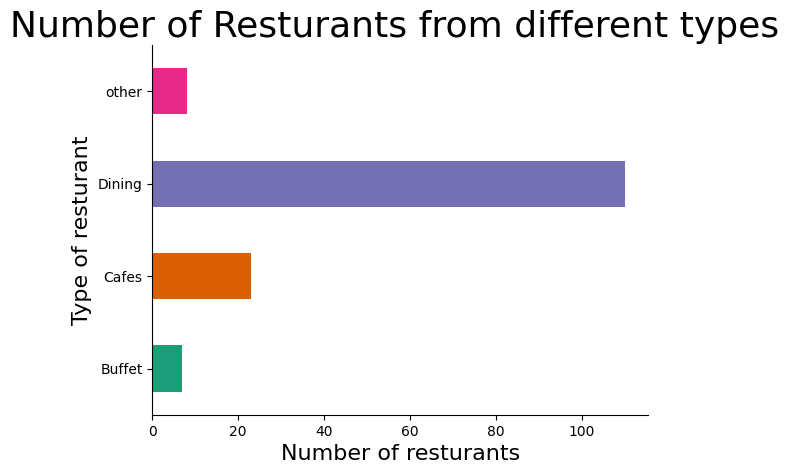

In [ ]:
dataframe.groupby('listed_in(type)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Number of Resturants from different types ', c='black', size='26')
plt.xlabel('Number of resturants', c='black', size='16')
plt.ylabel('Type of resturant', c='black', size='16')
plt.gca().spines[['top', 'right',]].set_visible(False)

**2.which kind of resturant people liked most ?**

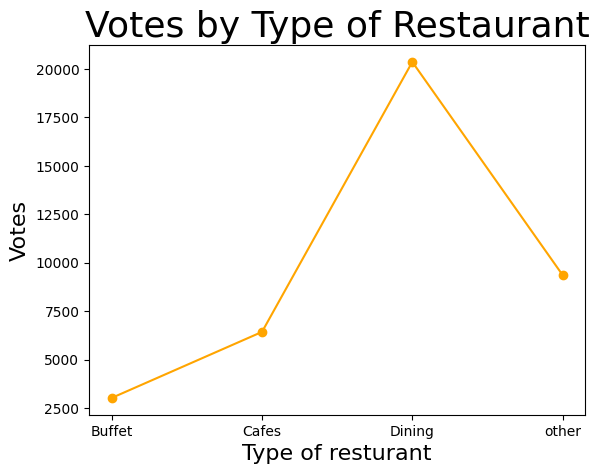

In [ ]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.title('Votes by Type of Restaurant', c='black', size='26')
plt.plot(result, c='orange', marker='o')
plt.xlabel('Type of resturant', c='black', size='16')
plt.ylabel('Votes', c='black', size='16')
plt.show()

***3. Average good rating from the votes ***

In [134]:
fig = px.scatter(
    dataframe,
    x='rate',
    y='votes',
    size_max=16,
    title='Ratings vs. Votes',
    labels={'rate': 'Rating', 'votes': 'Votes'},
    hover_data=['name']
)
fig.update_traces(marker=dict(size=16, color='black'))
fig.show()


***4. Average cost of expens for Two people ***

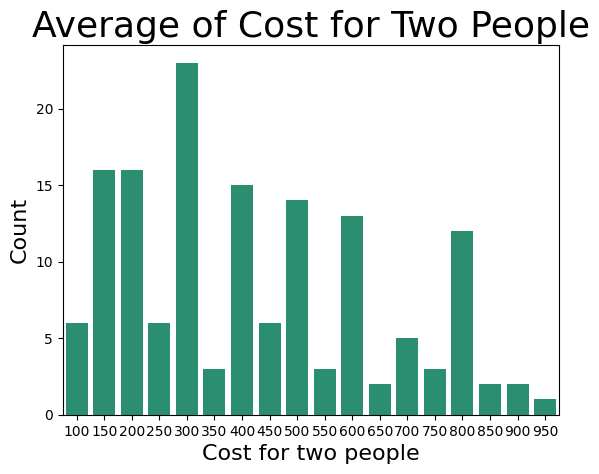

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, color=sns.color_palette('Dark2')[0])
plt.title('Average of Cost for Two People', c='black', size='26')
plt.xlabel('Cost for two people', c='black', size='16')
plt.ylabel('Count', c='black', size='16')
plt.show()

**5. Resturant Rating according to their order mode(Online/offline[take away]**)

<ipython-input-120-0c92407b8cec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=dataframe, palette="Set2")


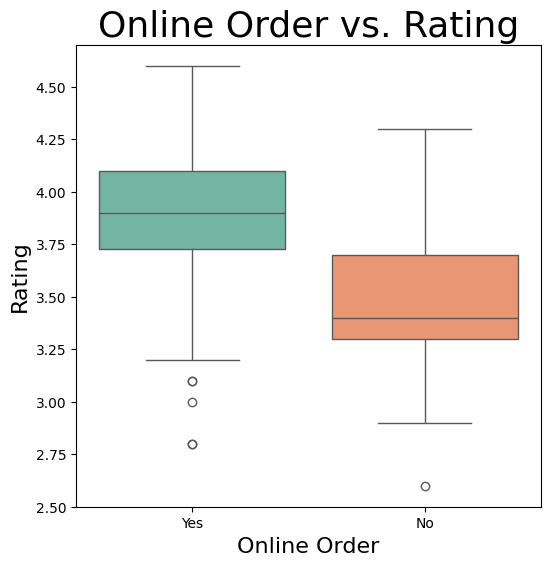

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe, palette="Set2")
plt.title('Online Order vs. Rating', c='black', size='26')
plt.xlabel('Online Order', c='black', size='16')
plt.ylabel('Rating', c='black', size='16')
plt.show()

**6. Online/offline Order Preference by Restaurant Type**

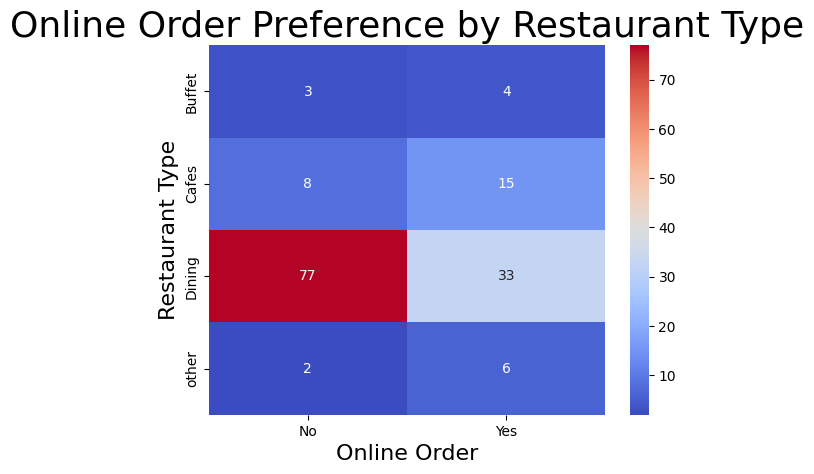

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Online Order Preference by Restaurant Type',  c='black', size='26')
plt.xlabel('Online Order', c='black', size='16')
plt.ylabel('Restaurant Type', c='black', size='16')
plt.show()